***
# <p style='text-align: center;'>`Tarea 4.1`</p>
***
`Elaborada por: Lyha Espinosa García, Ana Cristina Vázquez Vargas.` `Expedientes: if721861, if721215`


## 1. Simulate Model 1 using real data from stock

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yahoofinancials import YahooFinancials

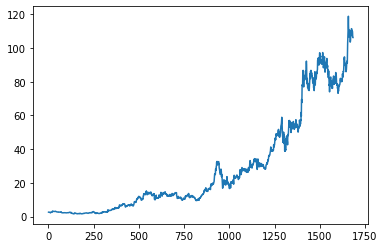

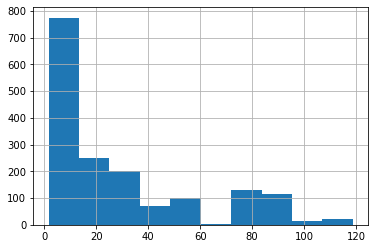

In [5]:
ticker = "AMD"
yahoo_financials = YahooFinancials(ticker)
data = yahoo_financials.get_historical_price_data("2015-01-01", "2021-09-10", "daily")
df = pd.DataFrame(data[ticker]["prices"])

data=pd.DataFrame(df.adjclose)

data["Rendimiento Simple"]=data.adjclose.pct_change()

data = data.dropna()
 
data.adjclose.plot()
plt.show()
data.adjclose.hist()
plt.show ()

In [6]:
So=105
r=data["Rendimiento Simple"].mean()
sigma=data["Rendimiento Simple"].var()
n=1/365

In [14]:
Sim=1000

TUnit=100 

Sn=pd.DataFrame(np.zeros(TUnit))
temp=pd.DataFrame(np.zeros(1))

Sn.iloc[0,:]=So
 

for sim in range(Sim):
    for S in range (TUnit-1):
        Sn.iloc[S+1,:] =Sn.iloc[S,:]*np.exp((r-0.5*sigma*sigma)*n + sigma*np.random.normal(size=1))

## 2. Plot model results vs historical data

### Model results

<AxesSubplot:>

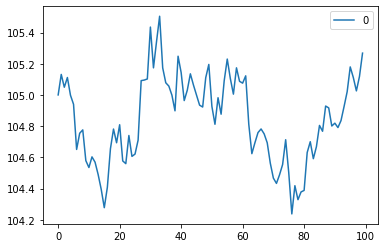

In [16]:
Sn.plot()

### Historical data

<AxesSubplot:>

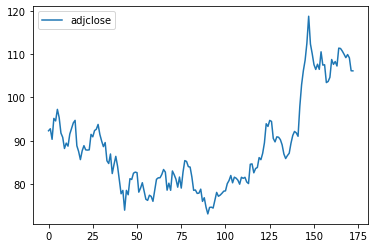

In [18]:
#Graficamos una cantidade de dias similar para poder hacer una mejor comparacion 

data2 = yahoo_financials.get_historical_price_data("2021-01-01", "2021-09-10", "daily")
df2 = pd.DataFrame(data2[ticker]["prices"])
data2=pd.DataFrame(df2.adjclose)
data2.plot()

Conclusiones:   

Al comparar los resultados del modelo con los precios históricos, nos damos cuenta que la caminata aleatoria es un primer acercamiento a la estimación del precio de un activo, con los datos históricos obtenemos los parámetros para que el modelo pueda hacer las estimaciones. Sin embargo este modelo nos brinda una estimación muy ingenua ya que como se puede obserbar en las gráficas el modelo no puede hacer estimaciones de cambios drásticos en el precio de los activos, existen modelos mas sofisticados que nos brindan resultados mas precisos pero aun así, el modelo de caminata aleatoria nos es útil ya que es la base de todos varios modelos. 